In [46]:

# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

For this ICP we are using a dataset that contains data pertaining to credit card customers. 

The dataset contains purchase and payment information. We wish to cluster these users into groups so that we can target big spenders.

## Data Exploration & Pre-Processing

In [47]:
# reading the data and looking at the first five rows of the data
cc_users=pd.read_csv("CC GENERAL.csv")
cc_users.head(15)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [48]:
#Get information about the dataset.
cc_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

We can see that we have fully numberical data besides the Customer ID. This ID does not tell us anything useful about spending habits so we will drops this column.

In [49]:
cc_users.drop(columns=['CUST_ID'], inplace=True)

We have null values in the columns 'Credit Limit' and 'Minumum payments'.

Lets drop any rows with null data

In [50]:
cc_users.dropna(how='any', inplace=True)

We now have a uniform dataset with no null values

In [51]:
#Get information about the dataset.
cc_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8636 non-null   float64
 1   BALANCE_FREQUENCY                 8636 non-null   float64
 2   PURCHASES                         8636 non-null   float64
 3   ONEOFF_PURCHASES                  8636 non-null   float64
 4   INSTALLMENTS_PURCHASES            8636 non-null   float64
 5   CASH_ADVANCE                      8636 non-null   float64
 6   PURCHASES_FREQUENCY               8636 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 10  CASH_ADVANCE_TRX                  8636 non-null   int64  
 11  PURCHASES_TRX                     8636 non-null   int64  
 12  CREDIT

In [52]:
# statistics of the data
cc_users.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


We can do initial data exploration by creating a heat map. This heat map displays the correlation between columns. For example, we can see that the purchases and oneoff_purchases are extremely correlated.

Highly correlated datapoints are likely to be assigned to the same cluster during Unsupervised Learning.

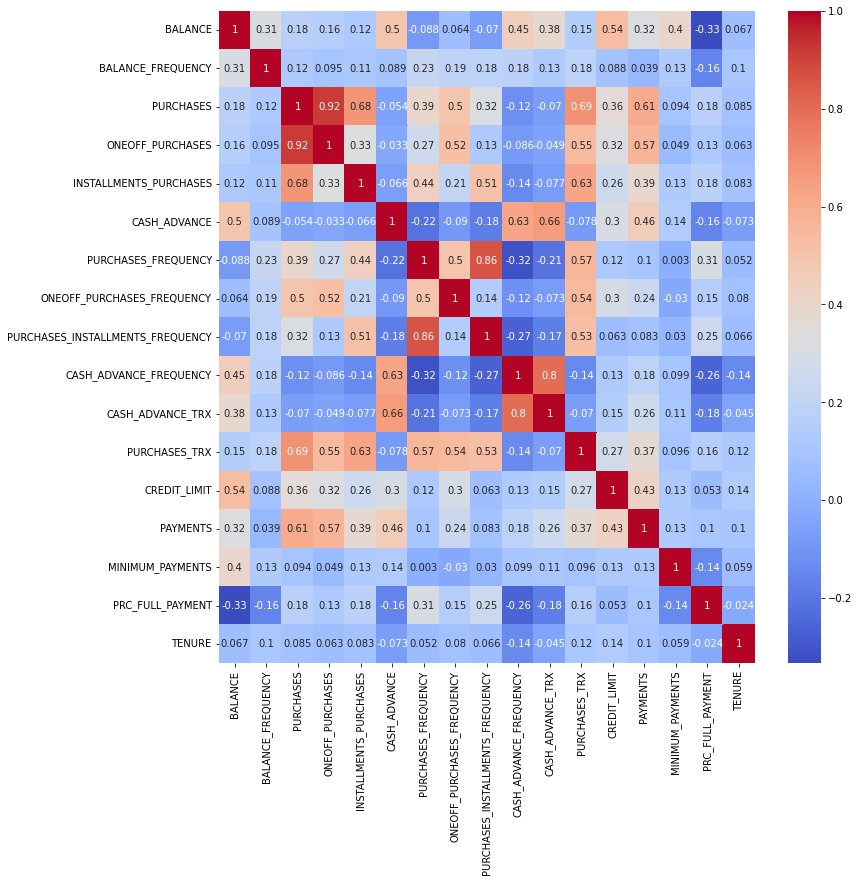

In [53]:
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(cc_users.corr(), annot=True, cmap='coolwarm')

KMeans uses Euclidian distance to calculate the cluster centroid. 

We Scale our data because KMeans is sensitive to outliers. By scaling it, we can get better centroids and thus a better inertia score.

In [54]:
from sklearn.preprocessing import StandardScaler
#Scale the data set and hold it in variable X by using fit_transform
scaler = StandardScaler()
X = scaler.fit_transform(cc_users)
X.shape

(8636, 17)

Let's see the statistics of our scaled data. This new data has a standard deviation of 1 for every column. This is from the scaling process where the Scalar transforms our data. This transformed data is called Standard data.

In [55]:
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03
mean,-2.506872e-18,-5.691243e-15,4.031476e-16,-5.819743e-15,2.643555e-15,-4.502548e-15,-2.185028e-16,-8.273836e-15,-2.426601e-15,1.812520e-15,-6.369898e-16,-2.611357e-15,5.480666e-16,4.343960e-17,1.740219e-16,-3.688766e-15,-2.976776e-15
std,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00
min,-7.641437e-01,-4.309583e+00,-4.732082e-01,-3.591603e-01,-4.588390e-01,-4.686555e-01,-1.236139e+00,-6.862796e-01,-9.265216e-01,-6.819525e-01,-4.794369e-01,-5.970542e-01,-1.222207e+00,-6.132812e-01,-3.643042e-01,-5.377269e-01,-4.221800e+00
25%,-6.934691e-01,6.767893e-02,-4.531953e-01,-3.591603e-01,-4.588390e-01,-4.686555e-01,-1.028455e+00,-6.862796e-01,-9.265216e-01,-6.819525e-01,-4.794369e-01,-5.573385e-01,-7.985975e-01,-4.694457e-01,-2.930083e-01,-5.377269e-01,3.551807e-01
50%,-3.265978e-01,5.054046e-01,-2.999696e-01,-3.324445e-01,-3.554965e-01,-4.686555e-01,9.968862e-03,-4.085365e-01,-5.078338e-01,-6.819525e-01,-4.794369e-01,-3.190448e-01,-4.159823e-01,-3.051243e-01,-2.326108e-01,-5.377269e-01,3.551807e-01
75%,2.405073e-01,5.054046e-01,5.562856e-02,-3.444604e-03,6.901931e-02,6.515234e-02,1.048393e+00,4.246962e-01,9.575697e-01,5.570222e-01,9.925796e-02,1.178270e-01,5.405558e-01,5.727990e-02,-1.635812e-02,2.485496e-02,3.551807e-01
max,8.323708e+00,5.054046e-01,2.215714e+01,2.384284e+01,2.407255e+01,2.175188e+01,1.256077e+00,2.646651e+00,1.585600e+00,6.751896e+00,1.731543e+01,1.362114e+01,6.963026e+00,1.681891e+01,3.184159e+01,2.837758e+00,3.551807e-01


## KMeans

Let's do KMeans clustering on our scaled data. We can iterate through different numbers of clusters and get an inertia score. 

Our goal is to have meaningful clusters that characterize all of the subgroups in the data.

We want to avoid choosing too many clusters because this can lead to bloat. It is best to take the smallest amount of clusters that also has a good inertia score.

We can do this by using the elbow method.

Text(0, 0.5, 'Inertia')

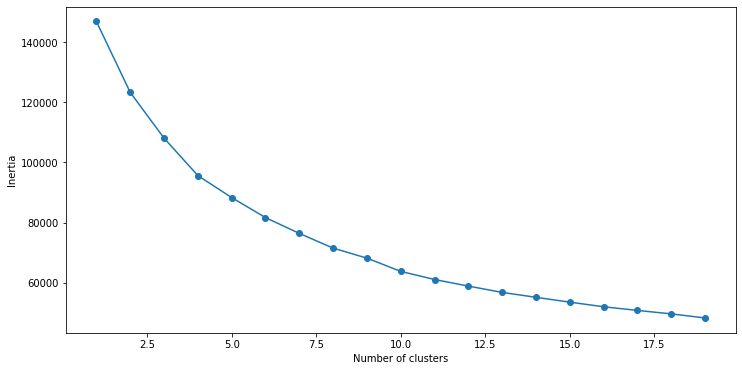

In [56]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

From the elbow plot, we choose k=5 to k=9 clusters for the data. We then create this new KMeans model and predict labels with a new dataset.

From the elbow plot, we choose 9 clusters for the data. We then create this new KMeans model and predict labels with a new dataset.

In [57]:
# k means using 5 clusters and k-means++ initialization
n_clusters = 5
k_means_orig = KMeans( n_clusters = n_clusters, init='k-means++')
k_means_orig.fit(X)
pred = k_means_orig.predict(X)

In [58]:
frame_orig = pd.DataFrame(X)
frame_orig['cluster'] = pred
frame_orig['cluster'].value_counts()

0    3139
3    3011
1    1248
2     980
4     258
Name: cluster, dtype: int64

## Visualization

Our dataset contains 17 dimensions, but humans can only comprehend 2 or 3 dimensions.

We need to get our dataset into a lower dimension for visualization so we will use principal component analysis.

In [59]:
from sklearn.decomposition import PCA

# Instantiate the pca object using 2 components
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X) #fit transform the data

Here we create another KMeans model and run the PCA data. This creates clusters for the lower dimensional data.

We chose to use 5 clusters according to the elbow method so we will again use 5 clusters for this reduced data.

### 5 Clusters

Fit a kmeans model with 5 clusters

In [60]:
# k means using 5 clusters and k-means++ initialization
k_means_5 = KMeans(n_clusters = n_clusters, init='k-means++', random_state=0)
k_means_5.fit(principalComponents)
pred = k_means_5.predict(principalComponents)

KMeans(n_clusters=5, random_state=0)

Get value counts for each cluster of principal components. We see that the principal components produced the same clusters as the scaled data. (see frame_orig above)

In [61]:
frame_5 = pd.DataFrame(principalComponents)
frame_5['cluster'] = pred
frame_5['cluster'].value_counts()

0    3139
3    3011
1    1248
2     980
4     258
Name: cluster, dtype: int64

We can now visualize our clusters. The first 2 principal components are able to capture most of the variance in the original dataset, but these clusters may differ slightly from the clusters gathered in the initial KMeans calculation.


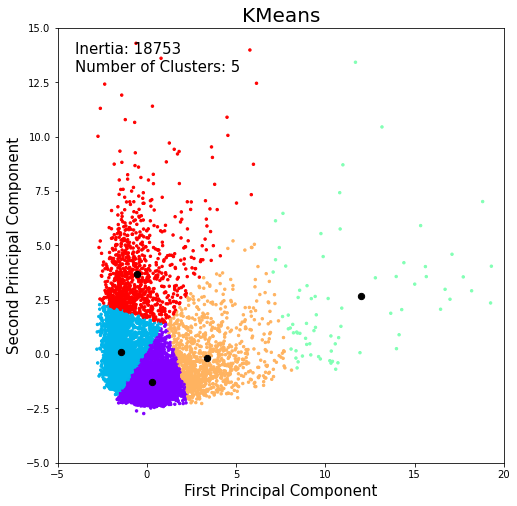

In [62]:
#plot the clusters
plt.figure(figsize=(8,8))
plt.scatter(principalComponents[:,0],principalComponents[:,1],c=k_means_5.labels_,cmap=plt.cm.get_cmap('rainbow'), s=6)
plt.scatter(k_means_5.cluster_centers_[:,0] , k_means_5.cluster_centers_[:,1] , s = 40, color = 'k')
plt.xlabel('First Principal Component', size=15)
plt.ylabel('Second Principal Component', size=15)
plt.axis([-5, 20, -5, 15])
plt.title('KMeans', size=20)
text = 'Inertia: {:.0f}\nNumber of Clusters: {}'.format(k_means_5.inertia_, k_means_5.n_clusters)
plt.text(-4, 13, text, size=15)
plt.show()

### 6 Clusters

Fit a kmeans model with 6 clusters

In [63]:
# k means using 6 clusters and k-means++ initialization
n_clusters = 6
k_means_6 = KMeans( n_clusters = n_clusters, init='k-means++')
k_means_6.fit(principalComponents)
pred = k_means_6.predict(principalComponents)

Get value counts for 6 clusters

In [64]:
frame_6 = pd.DataFrame(principalComponents)
frame_6['cluster'] = pred
frame_6['cluster'].value_counts()

0    2903
4    2875
3    1492
1     906
2     395
5      65
Name: cluster, dtype: int64

Visualisation for k=6

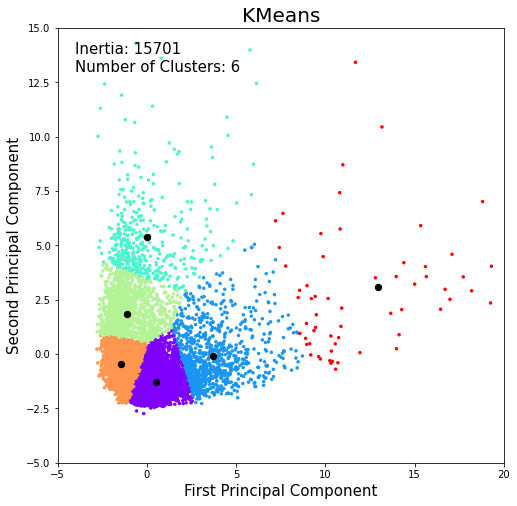

In [65]:
#plot the clusters
plt.figure(figsize=(8,8))
plt.scatter(principalComponents[:,0],principalComponents[:,1],c=k_means_6.labels_,cmap=plt.cm.get_cmap('rainbow'), s=6)
plt.scatter(k_means_6.cluster_centers_[:,0] , k_means_6.cluster_centers_[:,1] , s = 40, color = 'k')
plt.xlabel('First Principal Component', size=15)
plt.ylabel('Second Principal Component', size=15)
plt.axis([-5, 20, -5, 15])
plt.title('KMeans', size=20)
text = 'Inertia: {:.0f}\nNumber of Clusters: {}'.format(k_means_6.inertia_, k_means_6.n_clusters)
plt.text(-4, 13, text, size=15)
plt.show()

### 7 Clusters

Fit a model with 7 clusters

In [66]:
# k means using 7 clusters and k-means++ initialization
n_clusters = 7
k_means_7 = KMeans( n_clusters = n_clusters, init='k-means++')
k_means_7.fit(principalComponents)
pred = k_means_7.predict(principalComponents)

Get value counts for 7 clusters

In [67]:
frame_7 = pd.DataFrame(principalComponents)
frame_7['cluster'] = pred
frame_7['cluster'].value_counts()

4    2705
1    2689
0    1375
5    1172
6     387
3     278
2      30
Name: cluster, dtype: int64

Visualisation for k=7

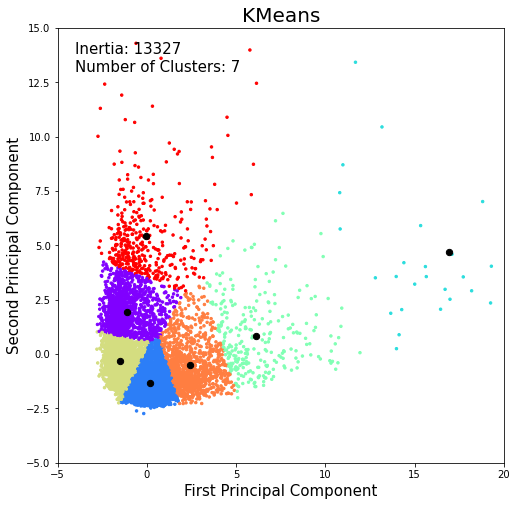

In [68]:
plt.figure(figsize=(8,8))
plt.scatter(principalComponents[:,0],principalComponents[:,1],c=k_means_7.labels_,cmap=plt.cm.get_cmap('rainbow'), s=6)
plt.scatter(k_means_7.cluster_centers_[:,0] , k_means_7.cluster_centers_[:,1] , s = 40, color = 'k')
plt.xlabel('First Principal Component', size=15)
plt.ylabel('Second Principal Component', size=15)
plt.axis([-5, 20, -5, 15])
plt.title('KMeans', size=20)
text = 'Inertia: {:.0f}\nNumber of Clusters: {}'.format(k_means_7.inertia_, k_means_7.n_clusters)
plt.text(-4, 13, text, size=15)
plt.show()

### 8 Clusters

Fit a model with 8 clusters

In [69]:
# k means using 8 clusters and k-means++ initialization
n_clusters = 8
k_means_8 = KMeans( n_clusters = n_clusters, init='k-means++')
k_means_8.fit(principalComponents)
pred = k_means_8.predict(principalComponents)

Get value counts for 8 clusters

In [70]:
frame_8 = pd.DataFrame(principalComponents)
frame_8['cluster'] = pred
frame_8['cluster'].value_counts()

4    2660
0    2538
1    1127
3    1020
7     629
5     353
2     279
6      30
Name: cluster, dtype: int64

visualization for k=8

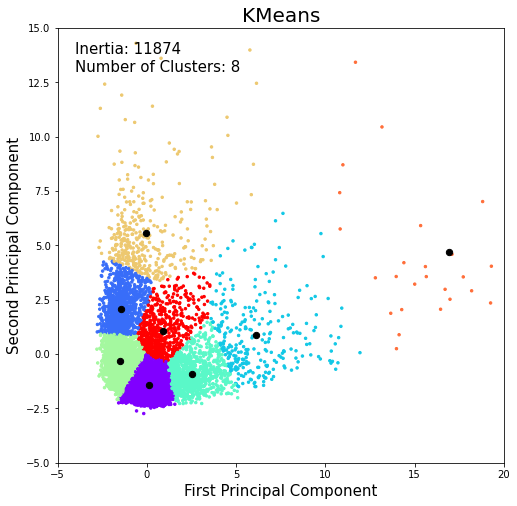

In [71]:
#plot the clusters
plt.figure(figsize=(8,8))
plt.scatter(principalComponents[:,0],principalComponents[:,1],c=k_means_8.labels_,cmap=plt.cm.get_cmap('rainbow'), s=6)
plt.scatter(k_means_8.cluster_centers_[:,0] , k_means_8.cluster_centers_[:,1] , s = 40, color = 'k')
plt.xlabel('First Principal Component', size=15)
plt.ylabel('Second Principal Component', size=15)
plt.axis([-5, 20, -5, 15])
plt.title('KMeans', size=20)
text = 'Inertia: {:.0f}\nNumber of Clusters: {}'.format(k_means_8.inertia_, k_means_8.n_clusters)
plt.text(-4, 13, text, size=15)
plt.show()

### 9 Clusters

Fit a KMeans model with 9 clusters

In [72]:
# k means using 9 clusters and k-means++ initialization
n_clusters = 9
k_means_9 = KMeans( n_clusters = n_clusters, init='k-means++')
k_means_9.fit(principalComponents)
pred = k_means_9.predict(principalComponents)

Get value counts for 9 clusters

In [73]:
frame_9 = pd.DataFrame(principalComponents)
frame_9['cluster'] = pred
frame_9['cluster'].value_counts()

6    2130
0    2038
3    1770
2     814
8     805
7     598
5     226
1     225
4      30
Name: cluster, dtype: int64

visualisation for k=9

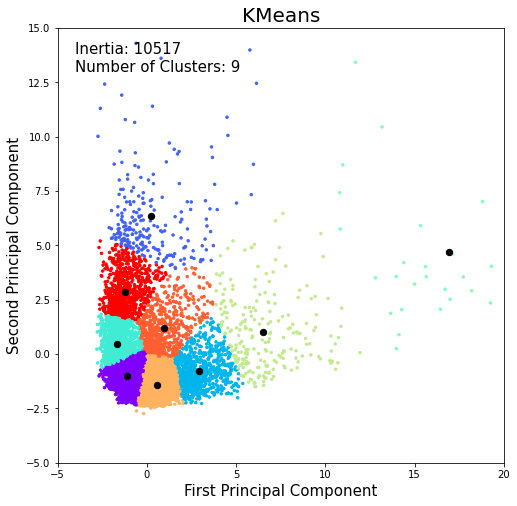

In [74]:
#Plot the clusters
plt.figure(figsize=(8,8))
plt.scatter(principalComponents[:,0],principalComponents[:,1],c=k_means_9.labels_,cmap=plt.cm.get_cmap('rainbow'), s=6)
plt.scatter(k_means_9.cluster_centers_[:,0] , k_means_9.cluster_centers_[:,1] , s = 40, color = 'k')
plt.xlabel('First Principal Component', size=15)
plt.ylabel('Second Principal Component', size=15)
plt.axis([-5, 20, -5, 15])
plt.title('KMeans', size=20)
text = 'Inertia: {:.0f}\nNumber of Clusters: {}'.format(k_means_9.inertia_, k_means_9.n_clusters)
plt.text(-4, 13, text, size=15)
plt.show()